In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
# !pip install plotly
# !pip install cufflinks

In [3]:
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
py.offline.init_notebook_mode(connected = True)
cf.go_offline()

In [4]:
train = pd.read_excel('Data Analyst - Test Data.xlsx')

In [5]:
train

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia
3,The hotel was adequate for my stay. The strips...,2019-08-20,NaN
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor
...,...,...,...
6443,"·the staff were all so friendly. frank, the ch...",2019-07-12,United States of America
6444,·the internet barely worked or didn't work,2019-07-12,United States of America
6445,·the location was great.\n \n \n \n \n ·the be...,2019-07-10,United States of America
6446,·we were early for check in and the staff was ...,2019-07-10,United States of America


In [6]:
train['Location'].fillna('other', inplace = True)

In [7]:
train.dropna(inplace=True)

In [8]:
train.isnull().sum()

Review      0
date        0
Location    0
dtype: int64

In [9]:
# !pip install textblob

In [10]:
from textblob import TextBlob

In [11]:
train['polarity'] = train['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
train['Review_len'] = train['Review'].apply(lambda x : len(x))
train['word_len']=train['Review'].apply(lambda x :len(x.split()))

In [12]:
train

,Review,date,Location,polarity,Review_len,word_len
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian,0.437037,196,33
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles,0.229167,134,25
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia,0.293939,106,20
3,The hotel was adequate for my stay. The strips...,2019-08-20,other,0.118333,447,84
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor,0.336565,126,20
...,...,...,...,...,...,...
6443,"·the staff were all so friendly. frank, the ch...",2019-07-12,United States of America,0.199008,682,132
6444,·the internet barely worked or didn't work,2019-07-12,United States of America,0.050000,42,7
6445,·the location was great.\n \n \n \n \n ·the be...,2019-07-10,United States of America,0.266667,94,16
6446,·we were early for check in and the staff was ...,2019-07-10,United States of America,0.200000,130,25


In [13]:
def get_avg_word_len(x):
  words= x.split()
  word_len = 0
  for word in words:
    word_len = word_len+len(word)

  return word_len/len(words)


In [14]:
train['avg_word_len'] = train['Review'].apply(lambda x : get_avg_word_len(x))

In [15]:
train

,Review,date,Location,polarity,Review_len,word_len,avg_word_len
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian,0.437037,196,33,4.696970
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles,0.229167,134,25,4.120000
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia,0.293939,106,20,4.000000
3,The hotel was adequate for my stay. The strips...,2019-08-20,other,0.118333,447,84,4.250000
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor,0.336565,126,20,5.000000
...,...,...,...,...,...,...,...
6443,"·the staff were all so friendly. frank, the ch...",2019-07-12,United States of America,0.199008,682,132,4.106061
6444,·the internet barely worked or didn't work,2019-07-12,United States of America,0.050000,42,7,5.142857
6445,·the location was great.\n \n \n \n \n ·the be...,2019-07-10,United States of America,0.266667,94,16,4.375000
6446,·we were early for check in and the staff was ...,2019-07-10,United States of America,0.200000,130,25,4.240000


In [16]:
train['polarity'].iplot(kind = 'hist',bins = 50,xTitle= 'Polarity', yTitle = 'Count',
                       title = 'Sentiment Polrity Distibution')

In [17]:
train['Review_len'].iplot(kind = 'hist',xTitle = 'Review_len',yTitle = 'Count',
                         title = 'Review len Distribution')

In [18]:
train['word_len'].iplot(kind = 'hist',xTitle = 'word_len',yTitle = 'Count',
                         title = 'word len Distribution')

In [19]:
train['avg_word_len'].iplot(kind = 'hist',xTitle = 'Avg word len',yTitle = 'Count',
                         title = 'Avg word len Distribution', bins = 20)

In [20]:
train['Location'].value_counts()

other                       4688
United States of America     116
New York                      34
San Jose                      19
California                    19
                            ... 
canada                         1
MS                             1
Queens, ny                     1
Weston                         1
Carolina Puerto Rico           1
Name: Location, Length: 1079, dtype: int64

In [21]:
train.groupby('Location').count()

,Review,date,polarity,Review_len,word_len,avg_word_len
Location,,,,,,
2186,1,1,1,1,1,1
"Aalborg, Denmark",1,1,1,1,1,1
Abbotsford BC,1,1,1,1,1,1
Agde,1,1,1,1,1,1
"Aguadilla, P.R.",1,1,1,1,1,1
...,...,...,...,...,...,...
warwick ny,1,1,1,1,1,1
"wyndham garden silicon valley ,san jose ca.",1,1,1,1,1,1
yakima wa,1,1,1,1,1,1


In [22]:
train

,Review,date,Location,polarity,Review_len,word_len,avg_word_len
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian,0.437037,196,33,4.696970
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles,0.229167,134,25,4.120000
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia,0.293939,106,20,4.000000
3,The hotel was adequate for my stay. The strips...,2019-08-20,other,0.118333,447,84,4.250000
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor,0.336565,126,20,5.000000
...,...,...,...,...,...,...,...
6443,"·the staff were all so friendly. frank, the ch...",2019-07-12,United States of America,0.199008,682,132,4.106061
6444,·the internet barely worked or didn't work,2019-07-12,United States of America,0.050000,42,7,5.142857
6445,·the location was great.\n \n \n \n \n ·the be...,2019-07-10,United States of America,0.266667,94,16,4.375000
6446,·we were early for check in and the staff was ...,2019-07-10,United States of America,0.200000,130,25,4.240000


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
def get_top_n_words(x,n):
    vec = CountVectorizer().fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key = lambda x: x[1], reverse  =True)
    return word_freq[:n]

In [25]:
words = get_top_n_words(train['Review'],100)

In [26]:
words

[('the', 14254),
 ('read', 10636),
 ('and', 8631),
 ('was', 7133),
 ('to', 6725),
 ('more', 5653),
 ('less', 5358),
 ('in', 3920),
 ('room', 3512),
 ('hotel', 3006),
 ('we', 3000),
 ('for', 2938),
 ('it', 2803),
 ('is', 2654),
 ('of', 2605),
 ('very', 2431),
 ('not', 1996),
 ('were', 1959),
 ('but', 1801),
 ('staff', 1798),
 ('at', 1727),
 ('great', 1637),
 ('that', 1598),
 ('with', 1522),
 ('had', 1519),
 ('on', 1500),
 ('this', 1475),
 ('my', 1407),
 ('location', 1381),
 ('clean', 1367),
 ('stay', 1313),
 ('nice', 1255),
 ('there', 1250),
 ('they', 1232),
 ('our', 1229),
 ('you', 1164),
 ('are', 1124),
 ('rooms', 1116),
 ('so', 1026),
 ('have', 992),
 ('good', 977),
 ('no', 972),
 ('from', 971),
 ('be', 888),
 ('all', 868),
 ('friendly', 794),
 ('would', 766),
 ('as', 765),
 ('check', 734),
 ('when', 729),
 ('out', 708),
 ('service', 659),
 ('time', 624),
 ('night', 618),
 ('like', 609),
 ('only', 604),
 ('us', 599),
 ('an', 594),
 ('parking', 589),
 ('one', 585),
 ('small', 570),
 (

In [27]:
df = pd.DataFrame(words, columns = ['Unigrams','Frequency'])

In [28]:
df.iplot(kind = 'bar', xTitle = 'Unigrams', yTitle = 'Count', title = 'Top 100 words Unigrams')
df = df.set_index('Unigrams')

In [29]:
def get_top_n_wordss(x,n):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key = lambda x: x[1], reverse  =True)
    return word_freq[:n]

In [30]:
wordss = get_top_n_wordss(train['Review'],100)

In [31]:
wordss

[('more read', 5313),
 ('read more', 5306),
 ('read less', 5306),
 ('in the', 1153),
 ('the room', 1122),
 ('the hotel', 979),
 ('it was', 939),
 ('room was', 867),
 ('and the', 836),
 ('of the', 821),
 ('to the', 706),
 ('was very', 632),
 ('at the', 585),
 ('the staff', 560),
 ('check in', 527),
 ('on the', 516),
 ('this hotel', 512),
 ('we were', 470),
 ('staff was', 455),
 ('front desk', 449),
 ('for the', 422),
 ('clean and', 418),
 ('close to', 414),
 ('had to', 378),
 ('the rooms', 374),
 ('we had', 361),
 ('was great', 360),
 ('hotel is', 346),
 ('great location', 342),
 ('to be', 340),
 ('the front', 335),
 ('was not', 329),
 ('there was', 322),
 ('our room', 317),
 ('from the', 314),
 ('hotel was', 280),
 ('rooms are', 277),
 ('did not', 276),
 ('very nice', 275),
 ('the location', 271),
 ('to get', 267),
 ('the pool', 261),
 ('friendly and', 258),
 ('very clean', 241),
 ('to disney', 240),
 ('it is', 238),
 ('again read', 237),
 ('but the', 233),
 ('new yorker', 232),
 ('was

In [32]:
df1 = pd.DataFrame(wordss, columns = ['Bigrams','Frequency'])
df1.iplot(kind = 'bar', xTitle = 'Bigrams', yTitle = 'Count', title = 'Top 100 words Bigrams')
df1 = df1.set_index('Bigrams')

In [33]:
def get_top_n_wordsss(x,n):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key = lambda x: x[1], reverse  =True)
    return word_freq[:n]

In [34]:
wordsss = get_top_n_wordsss(train['Review'],50)

In [35]:
wordsss

[('read more read', 5306),
 ('more read less', 5306),
 ('the room was', 410),
 ('the front desk', 300),
 ('again read more', 236),
 ('the staff was', 220),
 ('the new yorker', 205),
 ('in the room', 194),
 ('the hotel is', 169),
 ('the hotel was', 145),
 ('the rooms are', 145),
 ('stay here again', 134),
 ('of the hotel', 132),
 ('to disney springs', 131),
 ('hotel read more', 120),
 ('friendly and helpful', 117),
 ('room was clean', 115),
 ('staff was very', 114),
 ('we had to', 107),
 ('room read more', 106),
 ('empire state building', 105),
 ('was clean and', 105),
 ('walking distance to', 103),
 ('was very nice', 96),
 ('at the new', 96),
 ('madison square garden', 92),
 ('our room was', 92),
 ('very clean and', 91),
 ('and it was', 91),
 ('this hotel is', 90),
 ('room was very', 89),
 ('there was no', 88),
 ('one of the', 88),
 ('stay read more', 87),
 ('the rooms were', 85),
 ('for the price', 84),
 ('here again read', 83),
 ('at the front', 83),
 ('place to stay', 83),
 ('check 

In [36]:
df2 = pd.DataFrame(wordsss, columns = ['Trigrams','Frequency'])
df2.iplot(kind = 'bar', xTitle = 'Trigrams', yTitle = 'Count', title = 'Top 50 words Trigrams')
df2 = df2.set_index('Trigrams')

In [37]:
def get_top_n_words(x,n):
    vec = CountVectorizer(ngram_range=(1, 1), stop_words = 'english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key = lambda x: x[1], reverse  =True)
    return word_freq[:n]

In [38]:
words = get_top_n_words(train['Review'],100)

In [39]:
words

[('read', 10636),
 ('room', 3512),
 ('hotel', 3006),
 ('staff', 1798),
 ('great', 1637),
 ('location', 1381),
 ('clean', 1367),
 ('stay', 1313),
 ('nice', 1255),
 ('rooms', 1116),
 ('good', 977),
 ('friendly', 794),
 ('check', 734),
 ('service', 659),
 ('time', 624),
 ('night', 618),
 ('like', 609),
 ('parking', 589),
 ('small', 570),
 ('desk', 567),
 ('bed', 541),
 ('pool', 537),
 ('disney', 527),
 ('close', 526),
 ('property', 521),
 ('stayed', 510),
 ('new', 502),
 ('just', 498),
 ('helpful', 485),
 ('comfortable', 480),
 ('didn', 474),
 ('day', 459),
 ('place', 447),
 ('did', 439),
 ('bathroom', 434),
 ('resort', 433),
 ('breakfast', 424),
 ('area', 424),
 ('really', 389),
 ('lobby', 345),
 ('old', 335),
 ('walk', 325),
 ('price', 319),
 ('excellent', 317),
 ('shower', 316),
 ('times', 315),
 ('got', 314),
 ('floor', 309),
 ('beds', 303),
 ('food', 296),
 ('view', 293),
 ('square', 289),
 ('door', 283),
 ('little', 278),
 ('definitely', 276),
 ('restaurant', 271),
 ('water', 269),


In [40]:
df = pd.DataFrame(words, columns = ['Unigrams','Frequency'])
df = df.set_index('Unigrams')
df.iplot(kind = 'bar', xTitle = 'Unigrams', yTitle = 'Count', title = 'Top 100 words Unigrams')

##Bivaiate

In [41]:
def get_top_n_wordss(x,n):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words = 'english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key = lambda x: x[1], reverse  =True)
    return word_freq[:n]

In [42]:
wordss = get_top_n_wordss(train['Review'],100)

In [43]:
df1 = pd.DataFrame(wordss, columns = ['Bigrams','Frequency'])
df1 = df1.set_index('Bigrams')
df1.iplot(kind = 'bar', xTitle = 'Bigrams', yTitle = 'Count', title = 'Top 100 words Bigrams')


In [44]:
def get_top_n_wordsss(x,n):
    vec = CountVectorizer(ngram_range=(3, 3),stop_words = 'english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key = lambda x: x[1], reverse  =True)
    return word_freq[:n]

In [45]:
wordsss = get_top_n_wordsss(train['Review'],100)

In [46]:
df2 = pd.DataFrame(wordsss, columns = ['Trigrams','Frequency'])
df2 = df2.set_index('Trigrams')
df2.iplot(kind = 'bar', xTitle = 'Trigrams', yTitle = 'Count', title = 'Top 100 words Trigrams')


In [47]:
from sklearn.preprocessing import LabelEncoder
model = LabelEncoder()

In [48]:
train['Location_label'] = model.fit_transform(train['Location'].astype('str'))

In [49]:
train

,Review,date,Location,polarity,Review_len,word_len,avg_word_len,Location_label
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian,0.437037,196,33,4.696970,812
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles,0.229167,134,25,4.120000,436
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia,0.293939,106,20,4.000000,288
3,The hotel was adequate for my stay. The strips...,2019-08-20,other,0.118333,447,84,4.250000,1052
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor,0.336565,126,20,5.000000,647
...,...,...,...,...,...,...,...,...
6443,"·the staff were all so friendly. frank, the ch...",2019-07-12,United States of America,0.199008,682,132,4.106061,929
6444,·the internet barely worked or didn't work,2019-07-12,United States of America,0.050000,42,7,5.142857,929
6445,·the location was great.\n \n \n \n \n ·the be...,2019-07-10,United States of America,0.266667,94,16,4.375000,929
6446,·we were early for check in and the staff was ...,2019-07-10,United States of America,0.200000,130,25,4.240000,929


In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

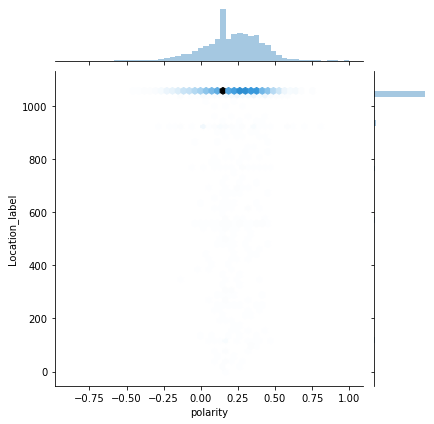

In [50]:
sns.jointplot(x= 'polarity', y = 'Location_label',data = train, kind = 'hex')

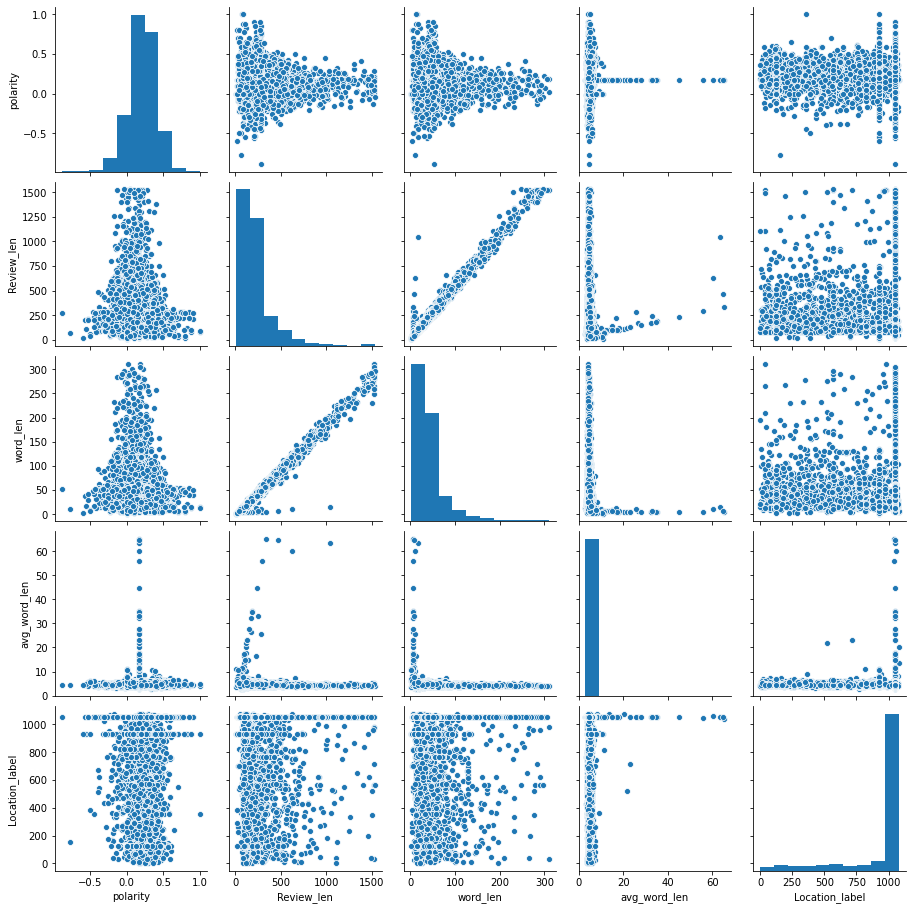

In [51]:
sns.pairplot(train)

In [52]:
# sns.pairplot(train, hue = 'Location_label')

In [53]:
train

,Review,date,Location,polarity,Review_len,word_len,avg_word_len,Location_label
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian,0.437037,196,33,4.696970,812
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles,0.229167,134,25,4.120000,436
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia,0.293939,106,20,4.000000,288
3,The hotel was adequate for my stay. The strips...,2019-08-20,other,0.118333,447,84,4.250000,1052
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor,0.336565,126,20,5.000000,647
...,...,...,...,...,...,...,...,...
6443,"·the staff were all so friendly. frank, the ch...",2019-07-12,United States of America,0.199008,682,132,4.106061,929
6444,·the internet barely worked or didn't work,2019-07-12,United States of America,0.050000,42,7,5.142857,929
6445,·the location was great.\n \n \n \n \n ·the be...,2019-07-10,United States of America,0.266667,94,16,4.375000,929
6446,·we were early for check in and the staff was ...,2019-07-10,United States of America,0.200000,130,25,4.240000,929


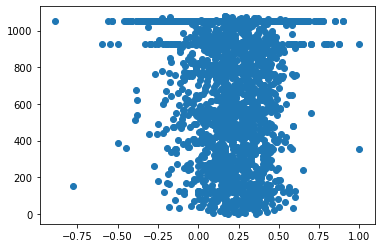

In [55]:
plt.scatter(train['polarity'], train['Location_label'])
plt.show()

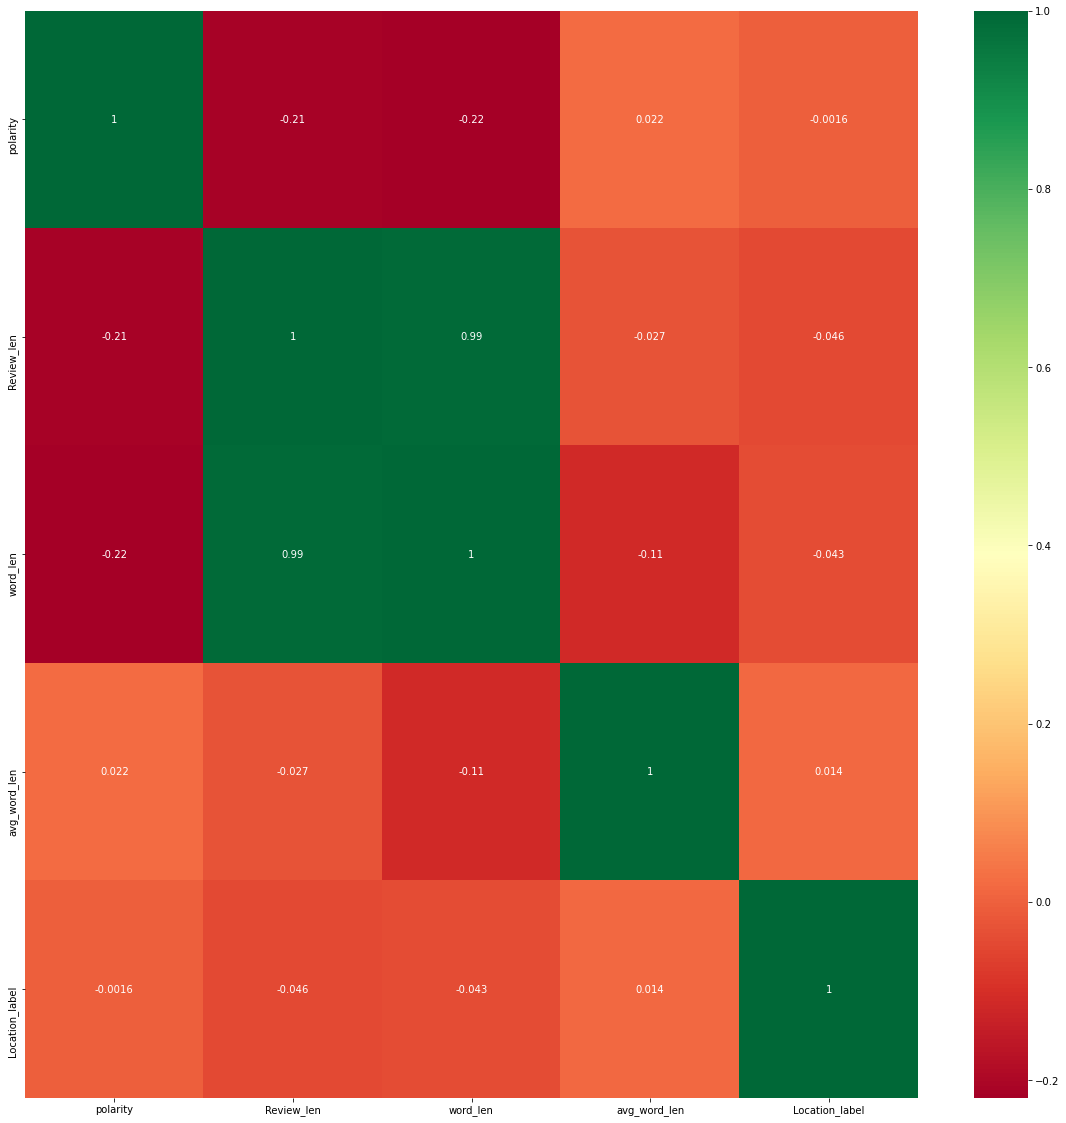

In [57]:
corrmat = train.corr()
top_corr_feature = corrmat.index
plt.figure(figsize= (20,20))
g= sns.heatmap(train[top_corr_feature].corr(),annot = True, cmap= 'RdYlGn')

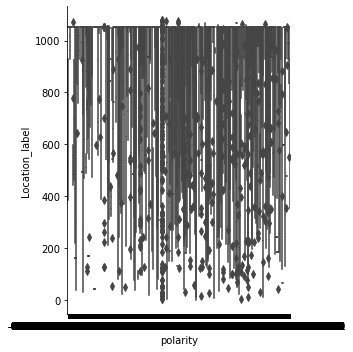

In [62]:
sns.catplot(x= 'polarity', y = 'Location_label', data = train,kind = 'box')

In [63]:
train['Location'].value_counts()

other                       4688
United States of America     116
New York                      34
San Jose                      19
California                    19
                            ... 
canada                         1
MS                             1
Queens, ny                     1
Weston                         1
Carolina Puerto Rico           1
Name: Location, Length: 1079, dtype: int64